In [1]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
from scipy.io import loadmat
import seaborn as sb

In [13]:
data = loadmat("D:\\most_wonted\\ai_projects\\unsupervised_ml\\data_sets\\ex7data2.mat")
# print(data)
# print(data['X'])
print(data['X'].shape)

(300, 2)


# initial centroids

In [3]:
def init_centroids(x, k):
    m, n = x.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m ,k)

    for i in range(k): # 0 1 2
        centroids[i,:] = x[idx[i], :] 

    return centroids


# select


In [4]:
def find_closet_centroid(x, centroids):
    m = x.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)

    for i in range(m):  # 0 1 2 3 .... 299
        min_dist = 10000000
        for j in range(k):  # 0 1 2
            dist = np.sum((x[i, :] - centroids[j, :]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    return idx

# displacement


In [5]:
def compute_centroids(x, idx, k):
    m, n = x.shape
    centroids = np.zeros((k, n))

    for i in range(k):
        indices = np.where(idx == i)
        centroids[i, :] = (np.sum(x[indices, :], axis= 1) / len(indices[0])).ravel()

    return centroids


# drew_data

In [6]:
def draw_data(x, centroids, idx, k):
    clusters = []
    color = ['r', 'g', 'b', 'y']
    for i in range(k):
        cluster = x[np.where(idx == i)[0],:]
        clusters.append(cluster)

    fig , ax = plt.subplots()
    for i in range(k):
        ax.scatter(clusters[i][:,0],clusters[i][:,1], label = 'clusster {}'.format(i+1),c = color[i])
        ax.scatter(centroids[i,0],centroids[i,1], s=300, c = color[i])
    ax.legend()
    

# k means clustering alg

In [7]:
def k_means(x, init_centroids, iters):
    m, n = x.shape
    k = init_centroids.shape[0]
    idx = np.zeros(m)
    centroids = init_centroids

    for i in range(iters):

        #select
        idx = find_closet_centroid(x, centroids)

        # displacement
        centroids = compute_centroids(x, idx, k)

        draw_data(x, centroids, idx, k)

    return centroids, idx

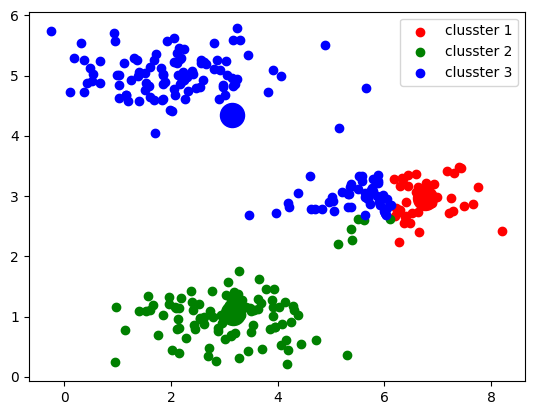

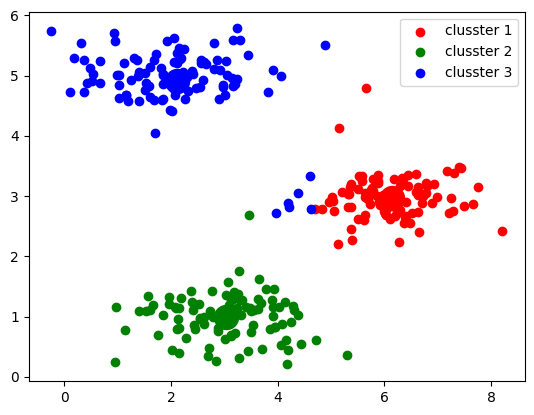

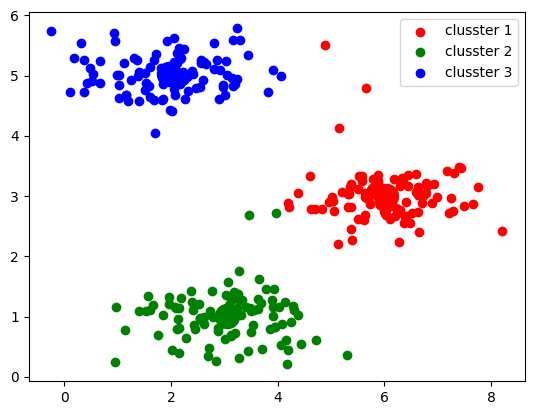

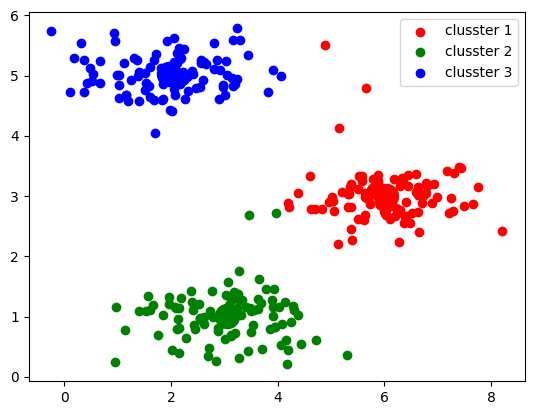

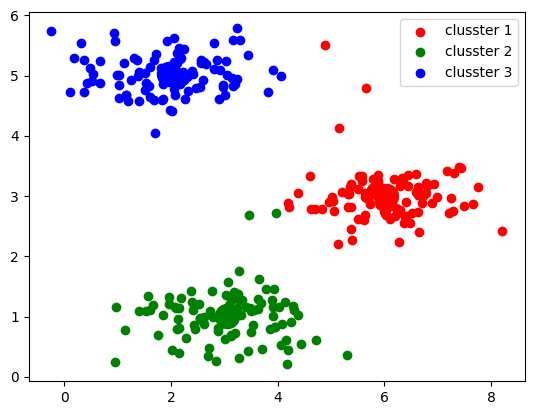

In [8]:
x = data['X']
k = 3

# initial centroids
# initial_centroids = np.array([[3, 3],[6, 2],[8 ,5]])
# initial_centroids = np.array([[8, 0],[8, 6],[0 ,3]])
initial_centroids = init_centroids(x, k)
# print(initial_centroids)

# #select
# idx = find_closet_centroid(x, initial_centroids)
# print(idx)

# # displacement
# centroids = compute_centroids(x, idx, k)
# print(centroids)

# run k-means clustering
iters = 5
centroids, idx = k_means(x, initial_centroids, iters)

# print(centroids)
# print(idx)

